In [4]:
import pandas as pd
from relative_path import PATH_DATA
from visualization import VisualizeMissing, export_profiling, export_correlation, export_col_hist

## Standard

In [5]:
TRACK_DATA = PATH_DATA / "tracks.parquet"
ARTISTS_DATA = PATH_DATA / "artists.parquet"

In [6]:
df_tracks = pd.read_parquet(TRACK_DATA)
df_artists = pd.read_parquet(ARTISTS_DATA)

In [7]:
export_col_hist(df_tracks, name="Tracks")
export_col_hist(df_artists, name="Artists")

In [9]:
export_correlation(df_tracks, name="Tracks")
export_correlation(df_artists, name="Artists")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4594: RuntimeWarning:

overflow encountered in long_scalars



In [10]:
export_profiling(df_tracks, name="Tracks")
export_profiling(df_artists, name="Artists")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
vis_missing_tracks = VisualizeMissing(df_tracks, "Tracks", export=True, process_zero=True, process_null=True)

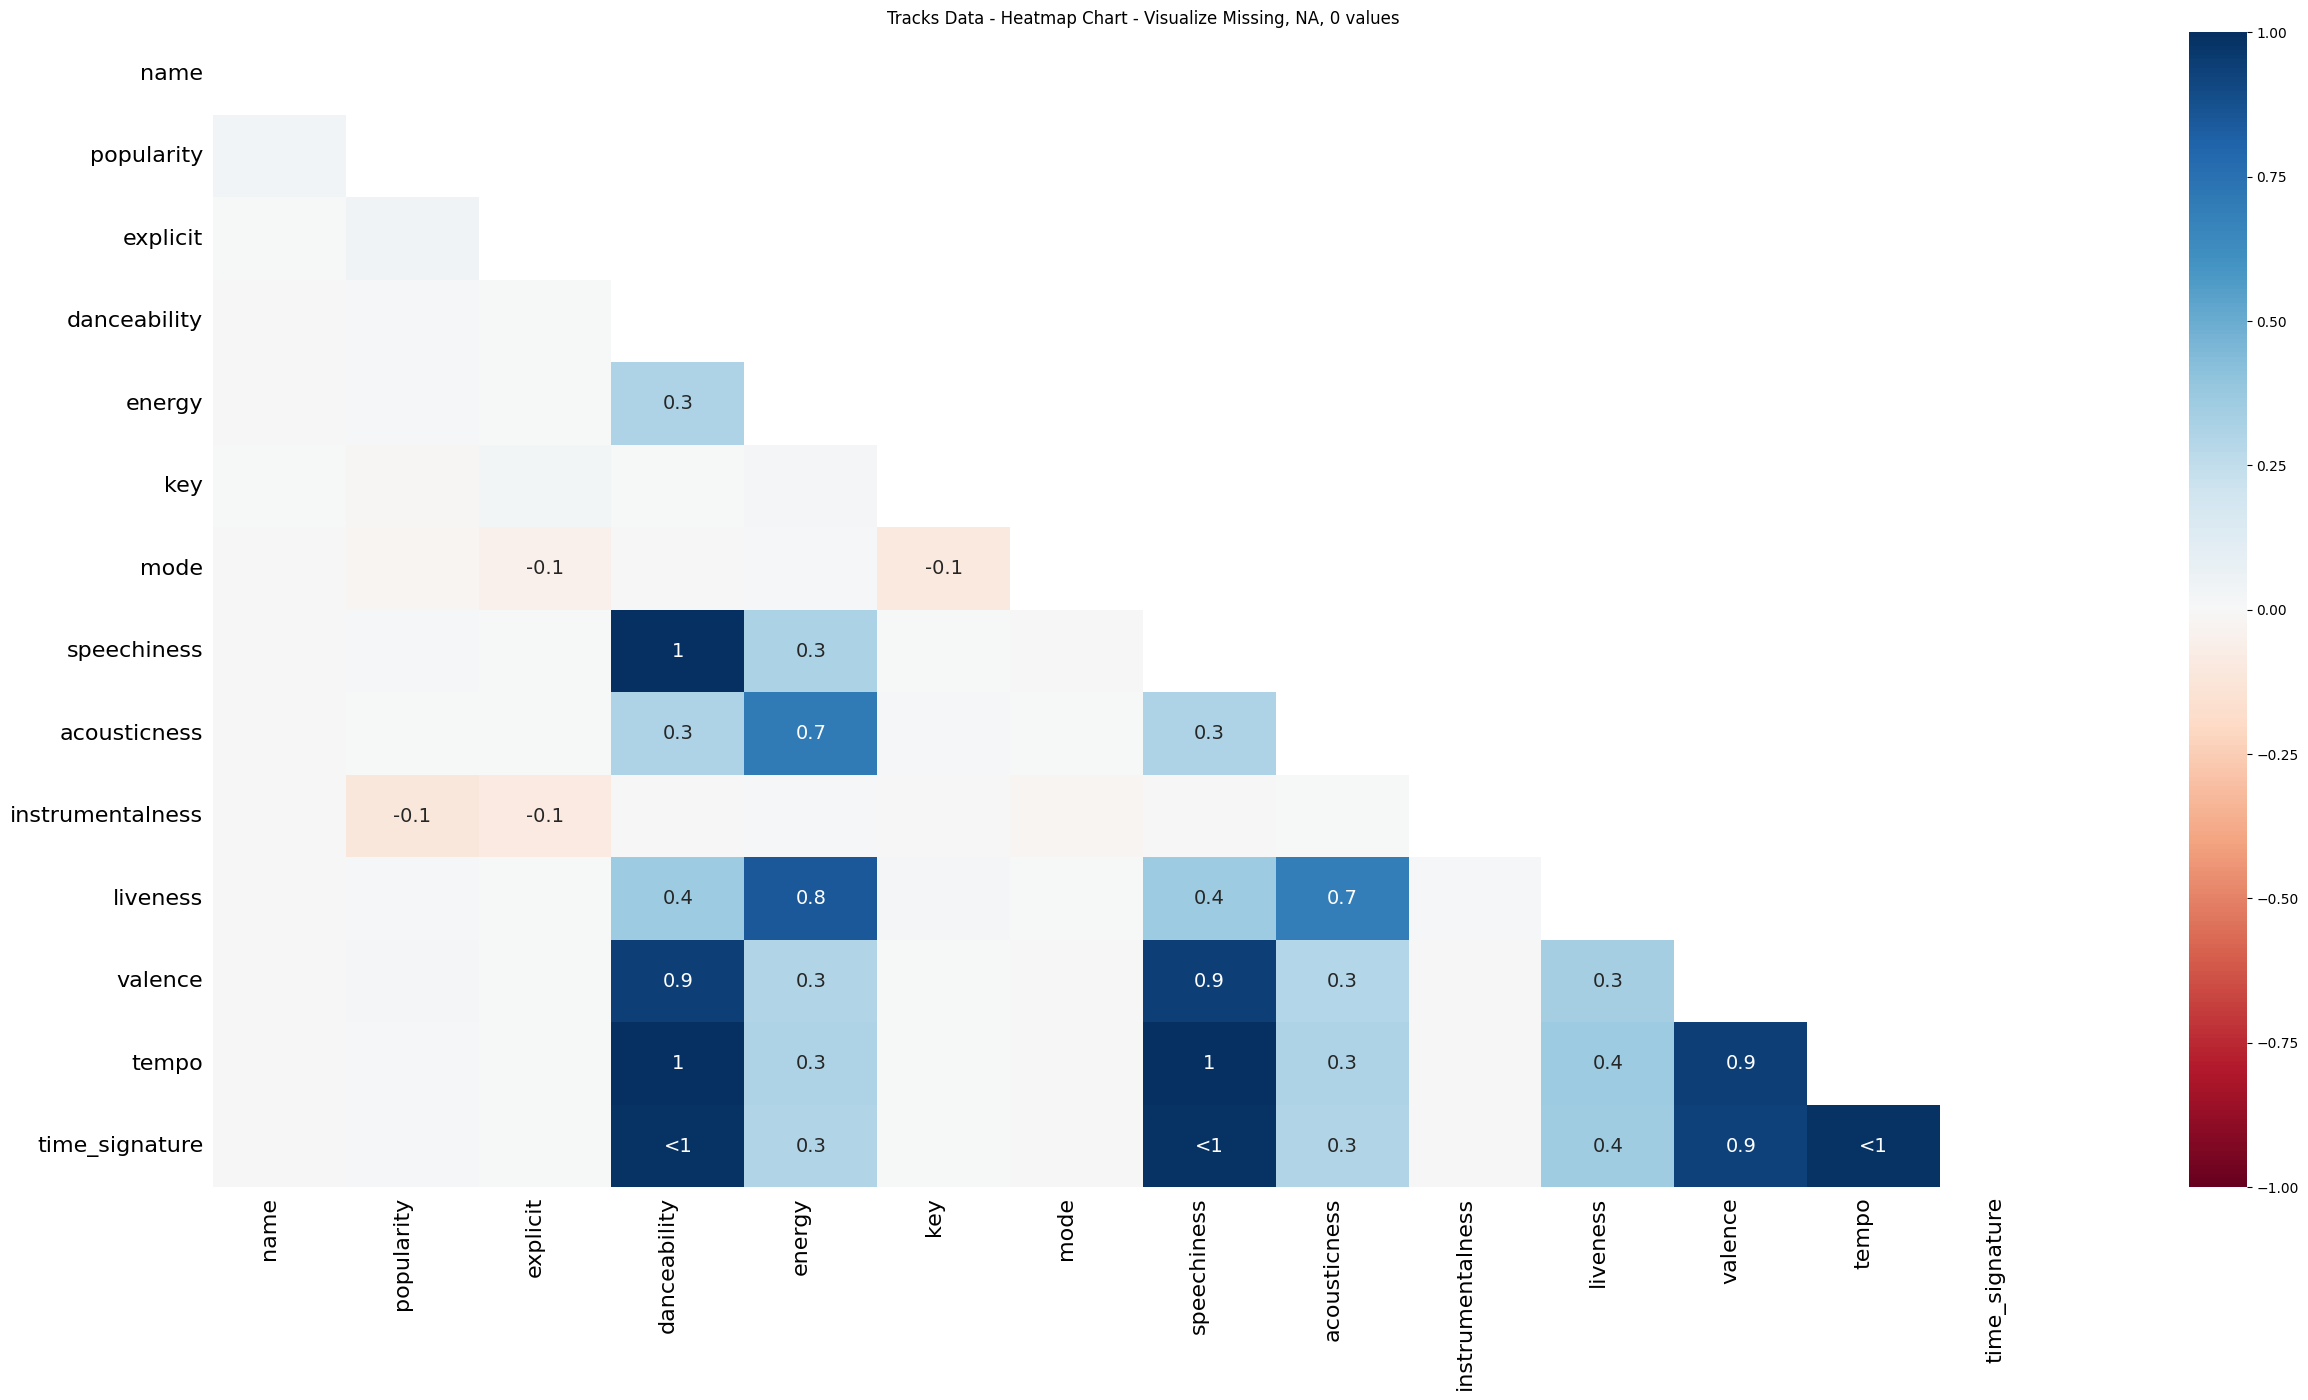

In [ ]:
vis_missing_tracks.Heatmap()

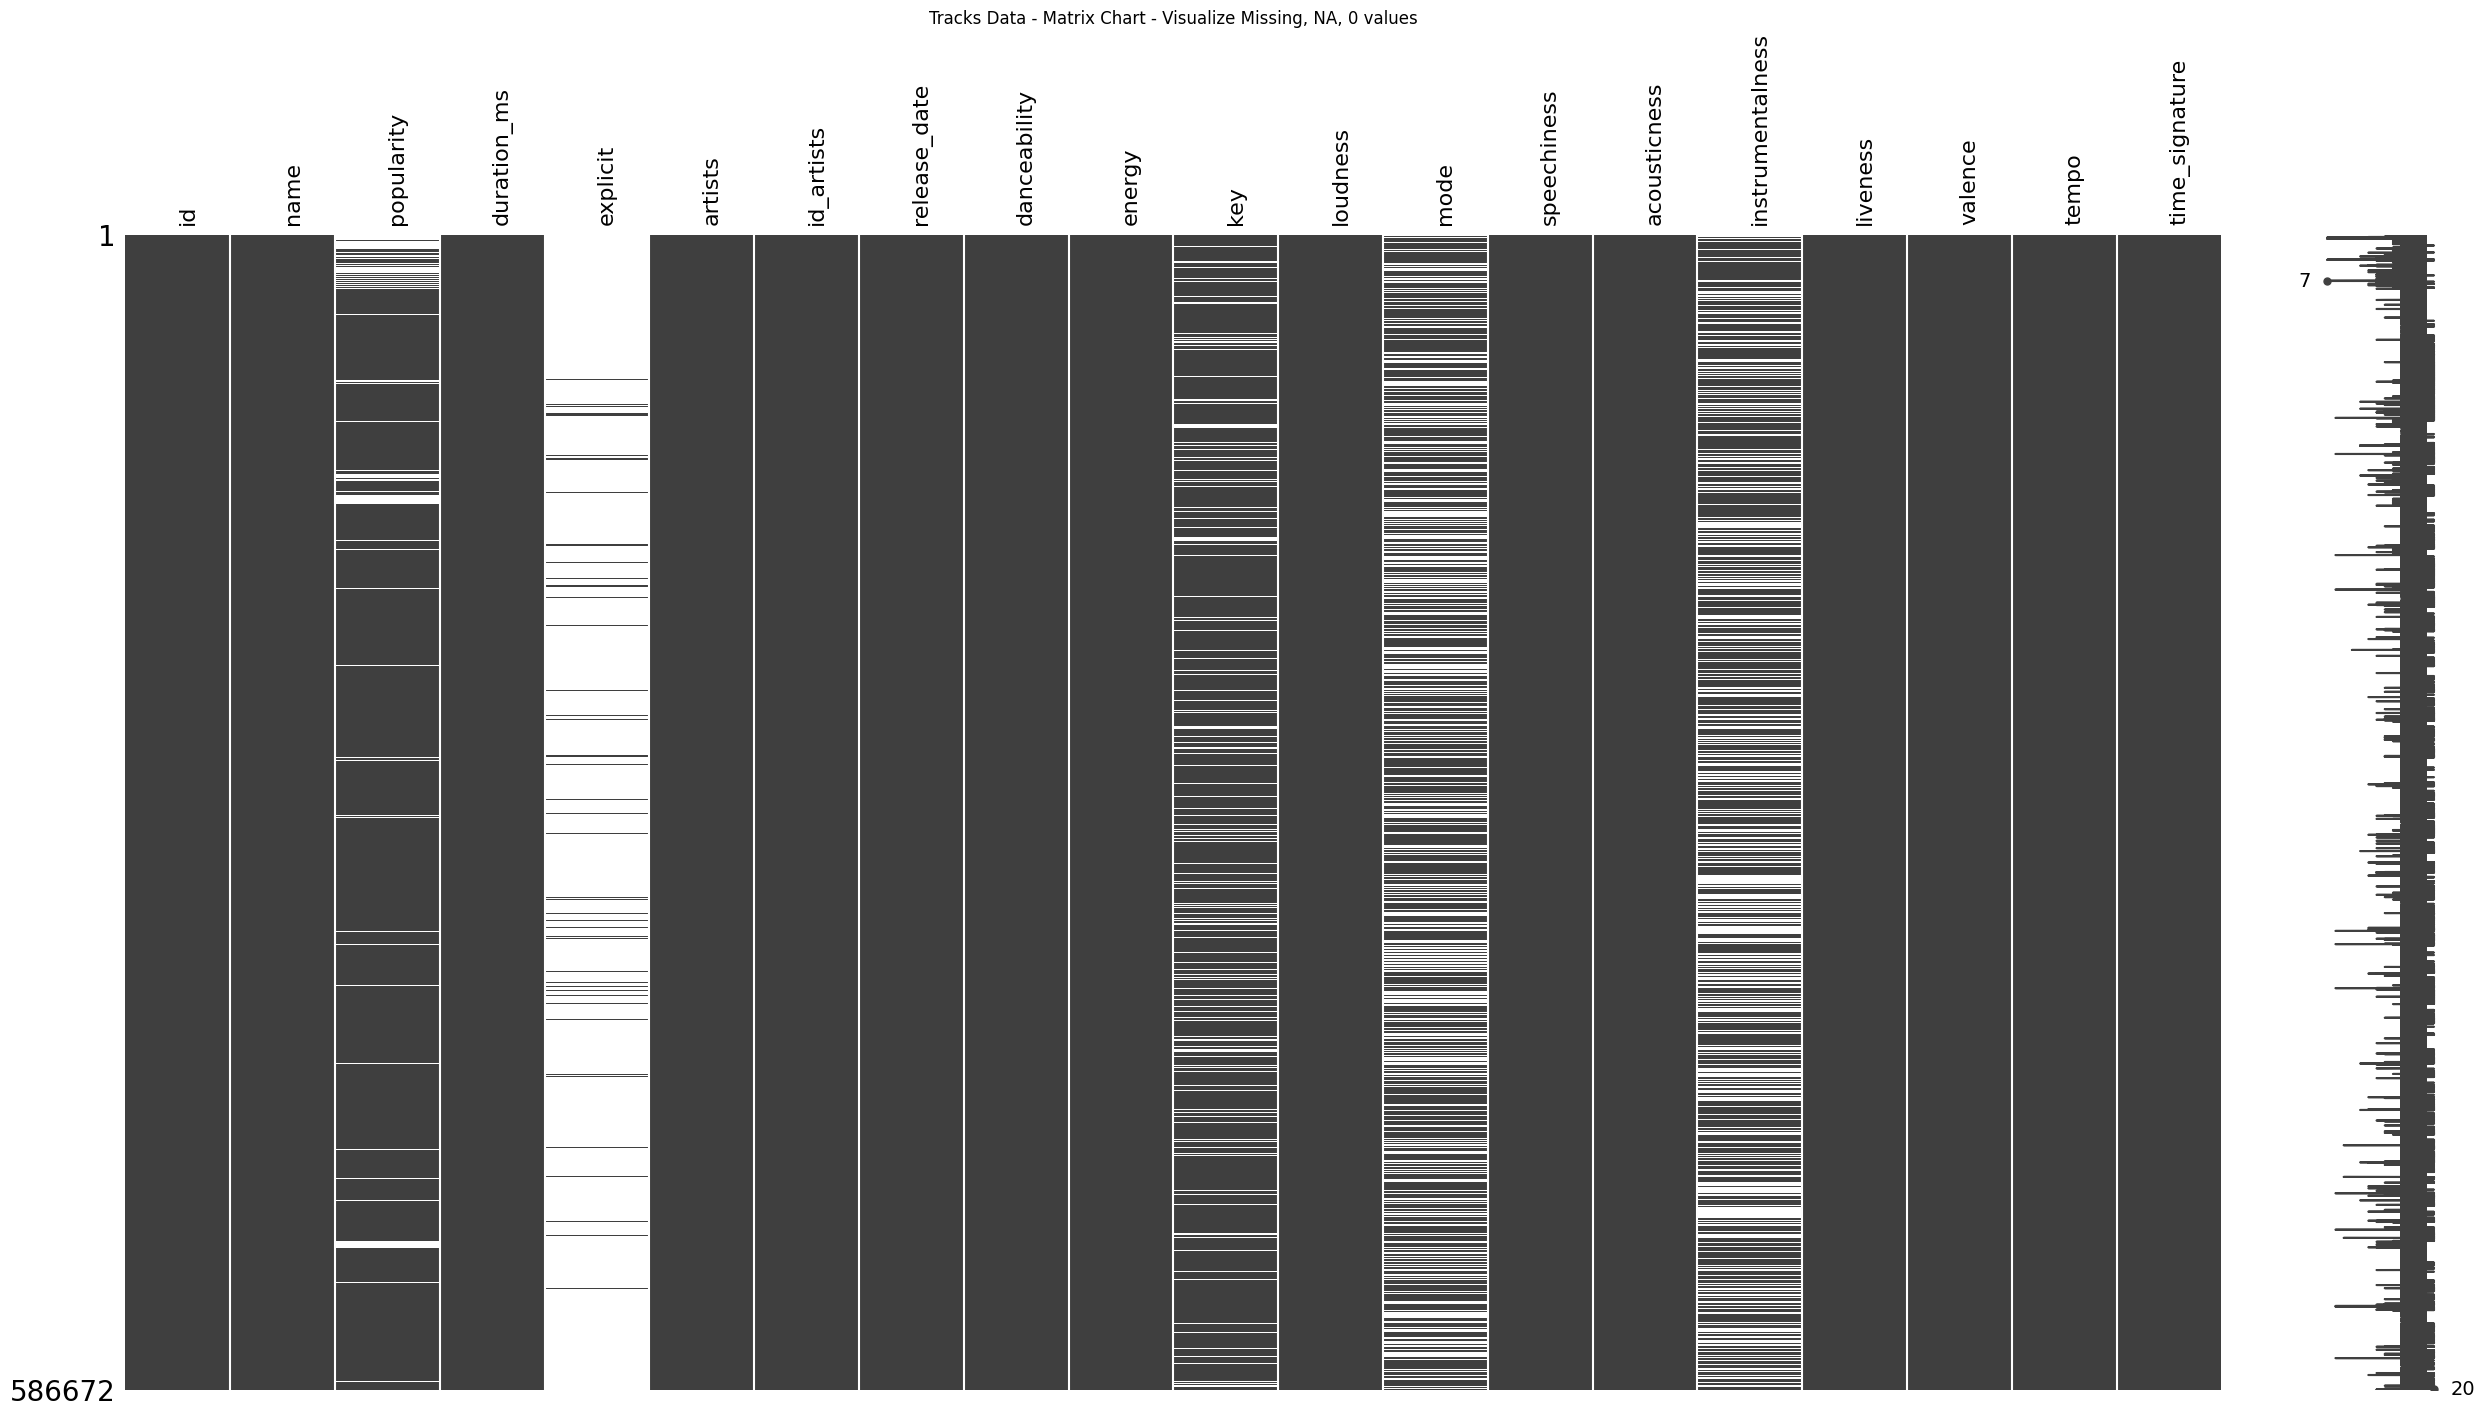

In [ ]:
vis_missing_tracks.Matrix()

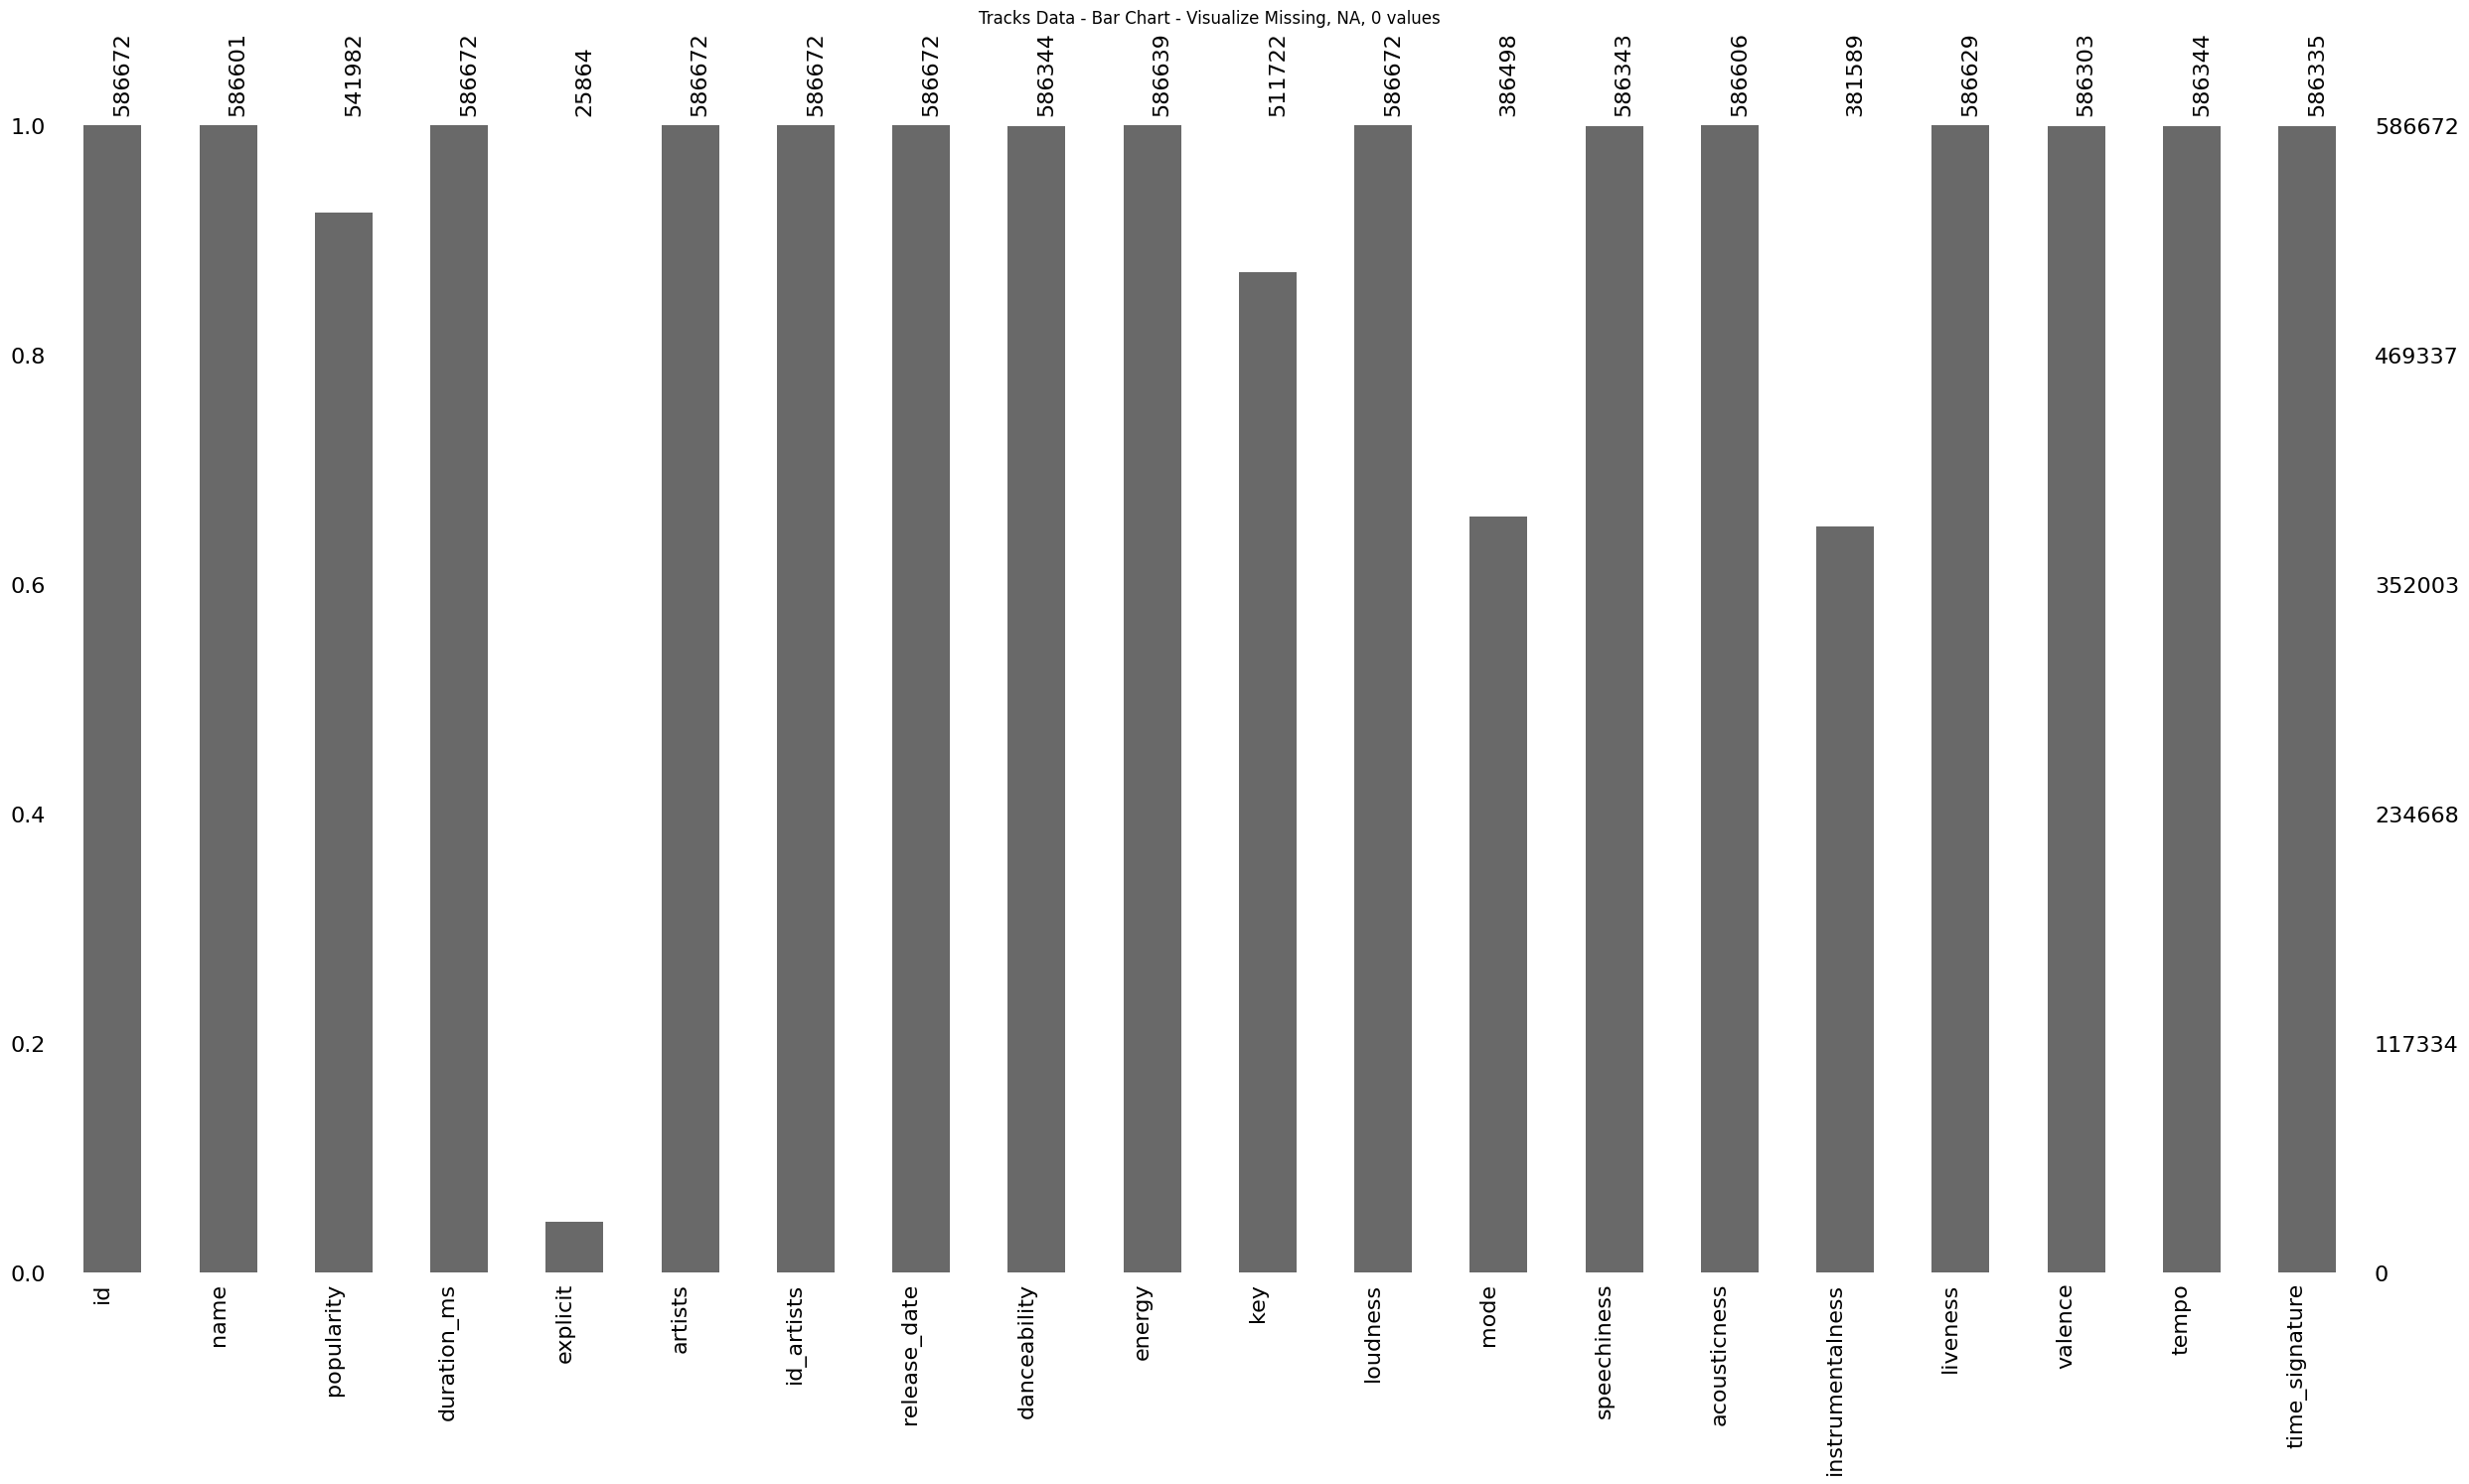

In [ ]:
vis_missing_tracks.Bar()

In [ ]:
vis_missing_artists = VisualizeMissing(df_artists, "Artists", export=True, process_zero=True, process_null=True)

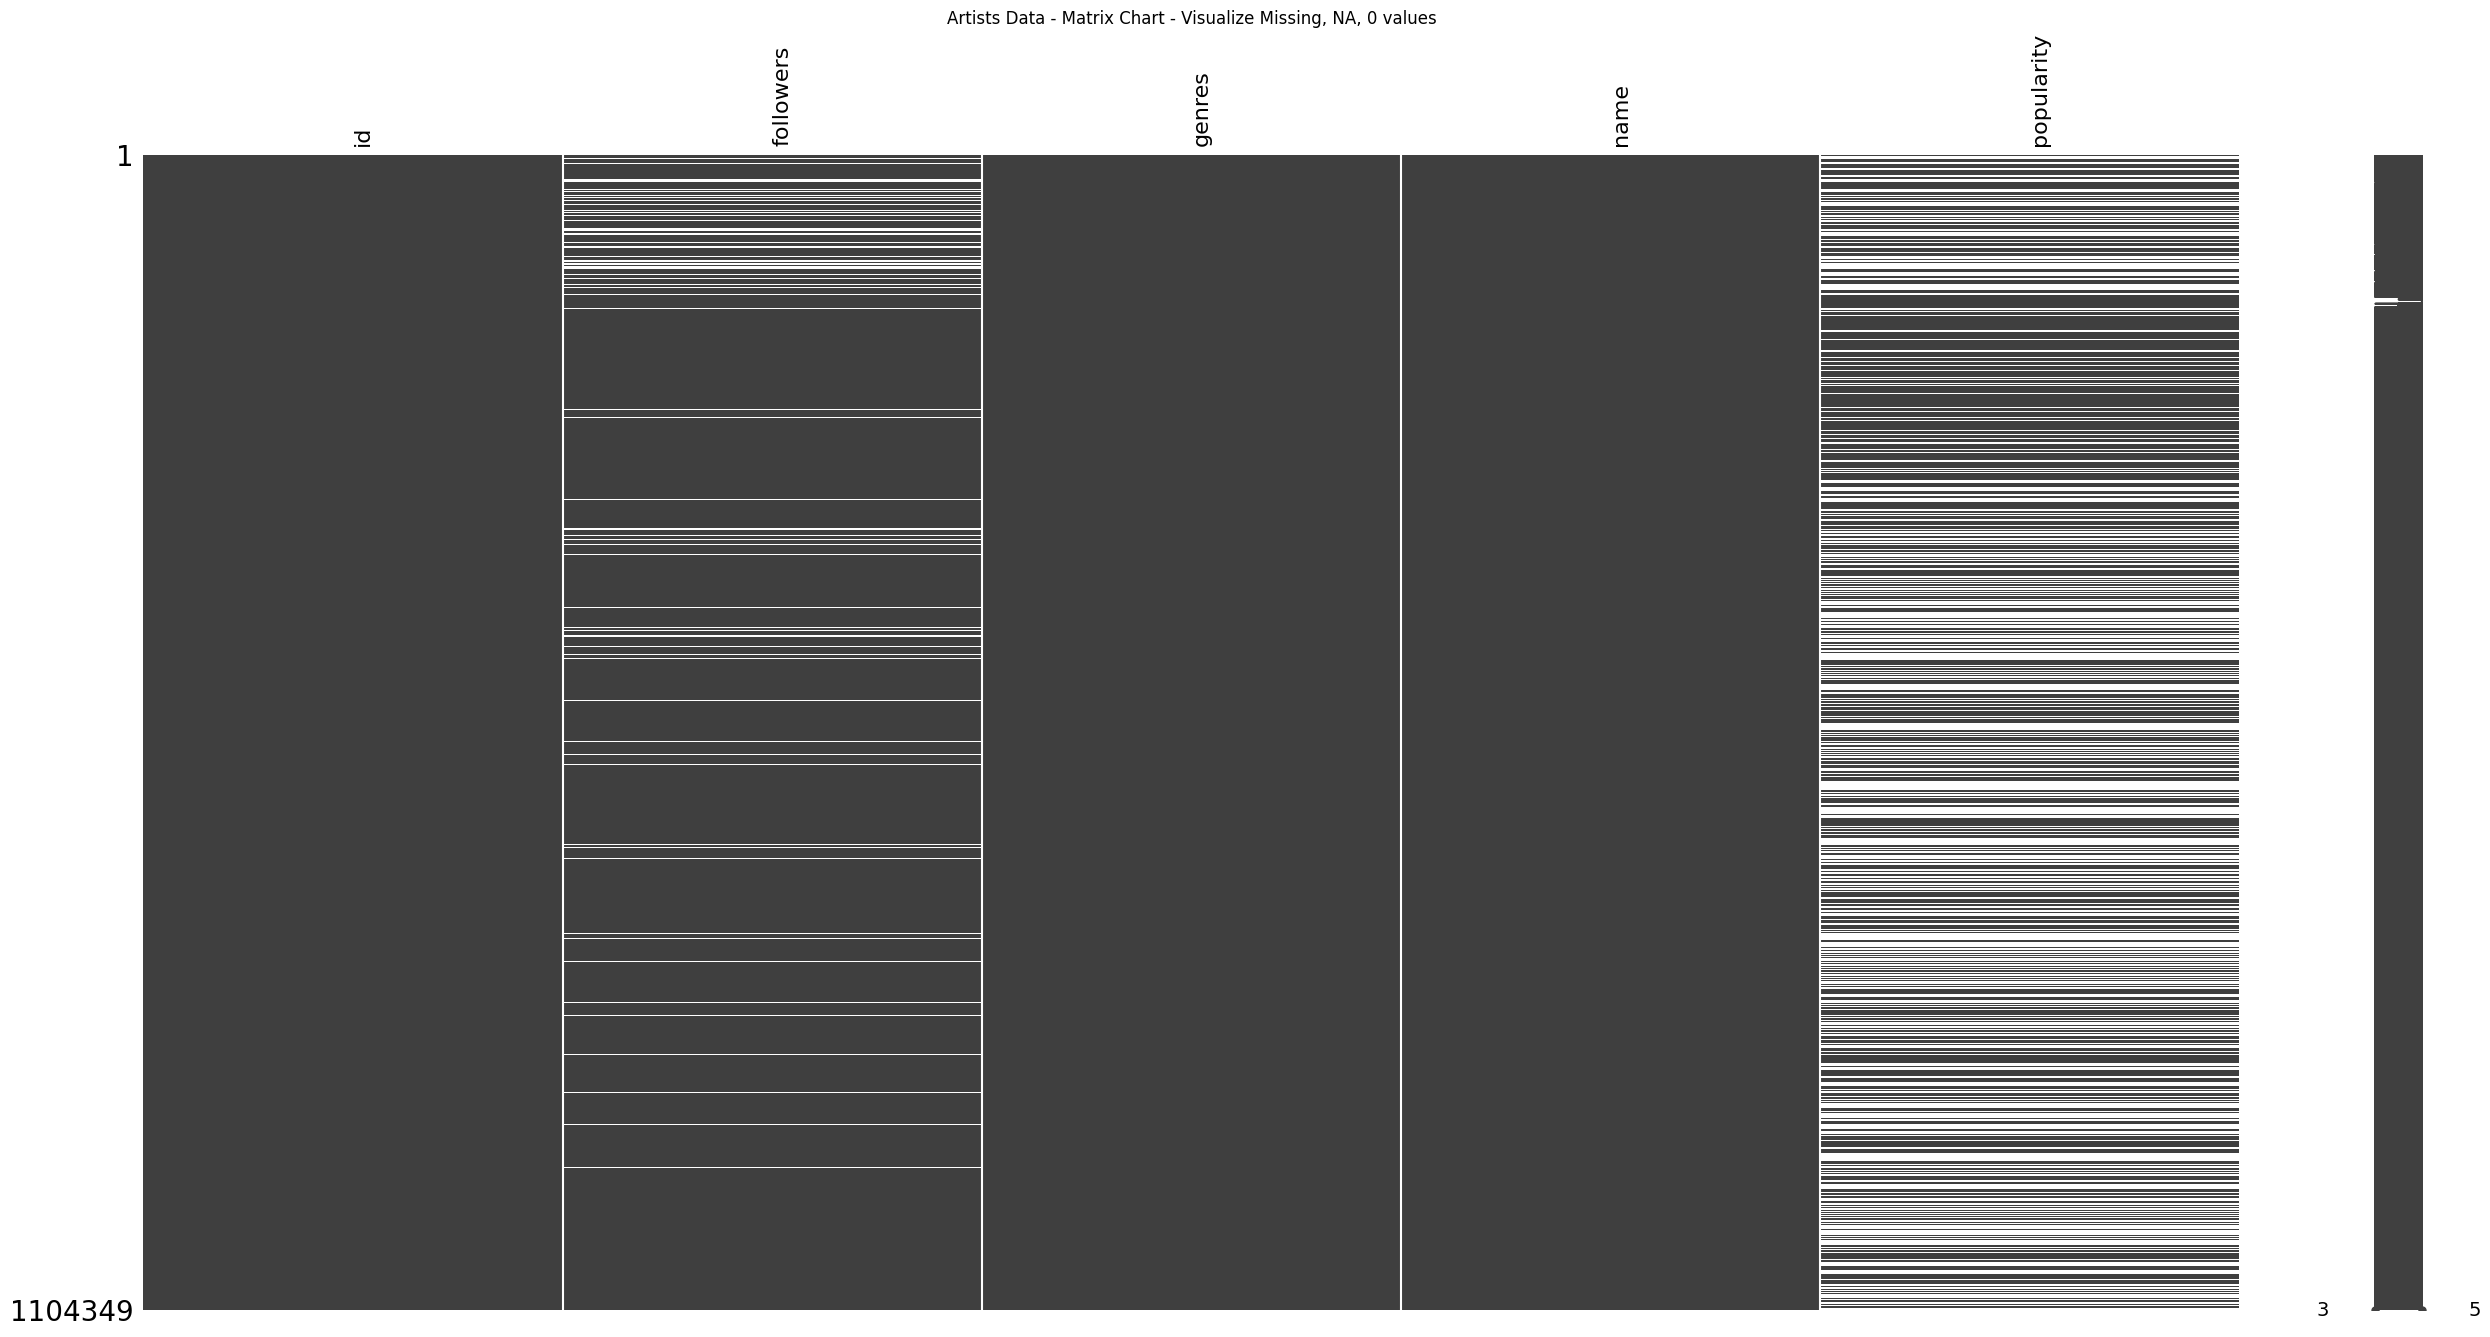

In [ ]:
vis_missing_artists.Matrix()

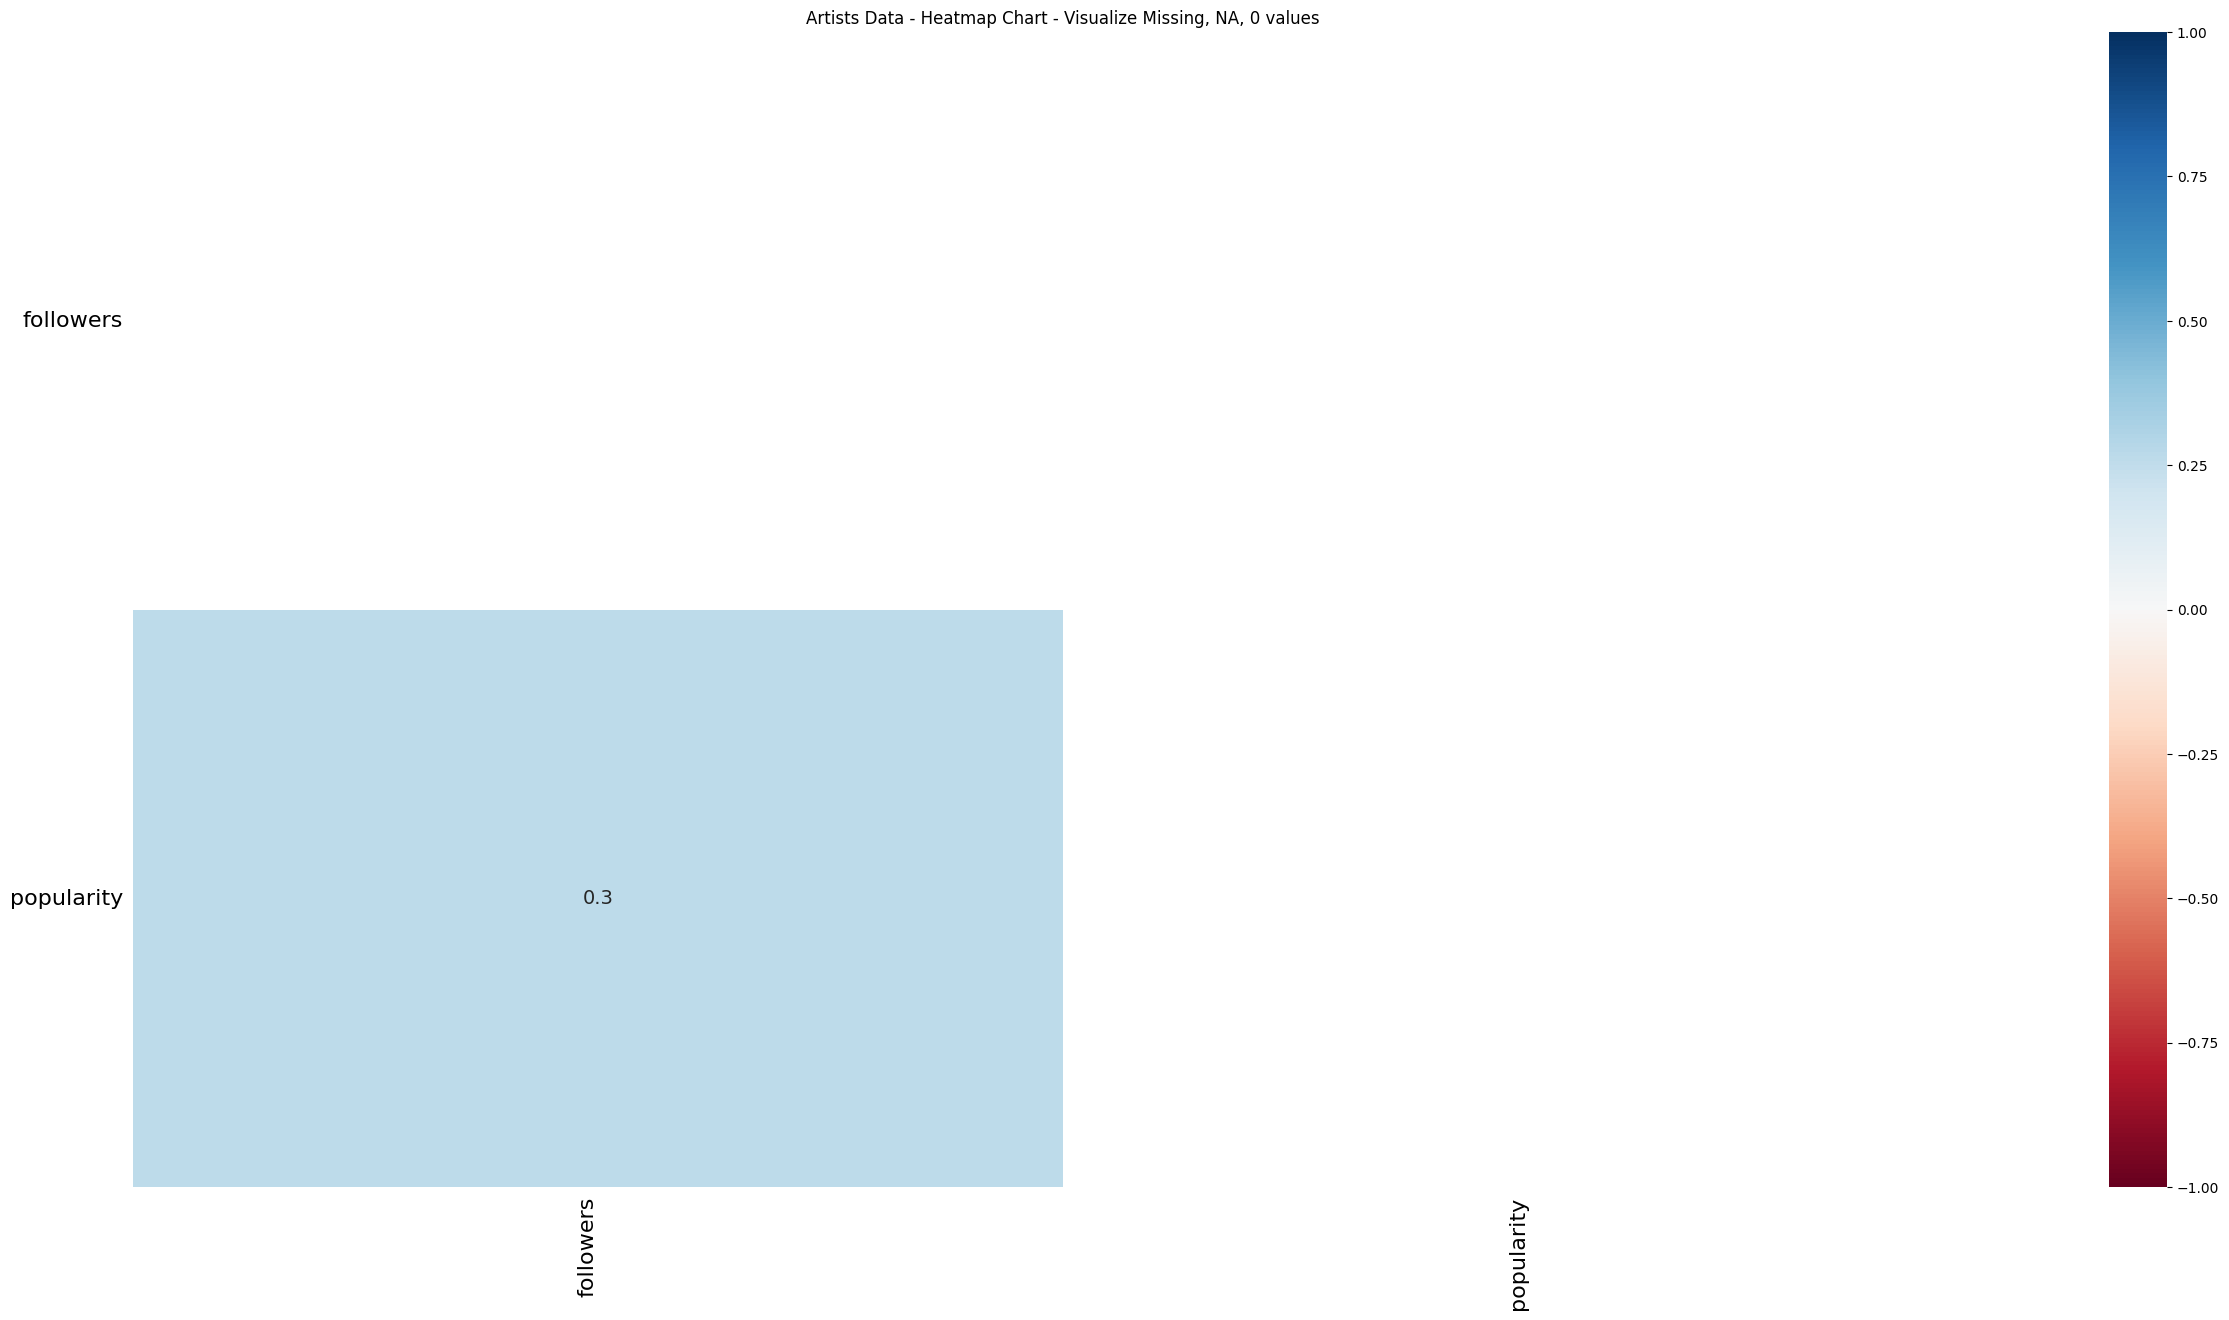

In [ ]:
vis_missing_artists.Heatmap()

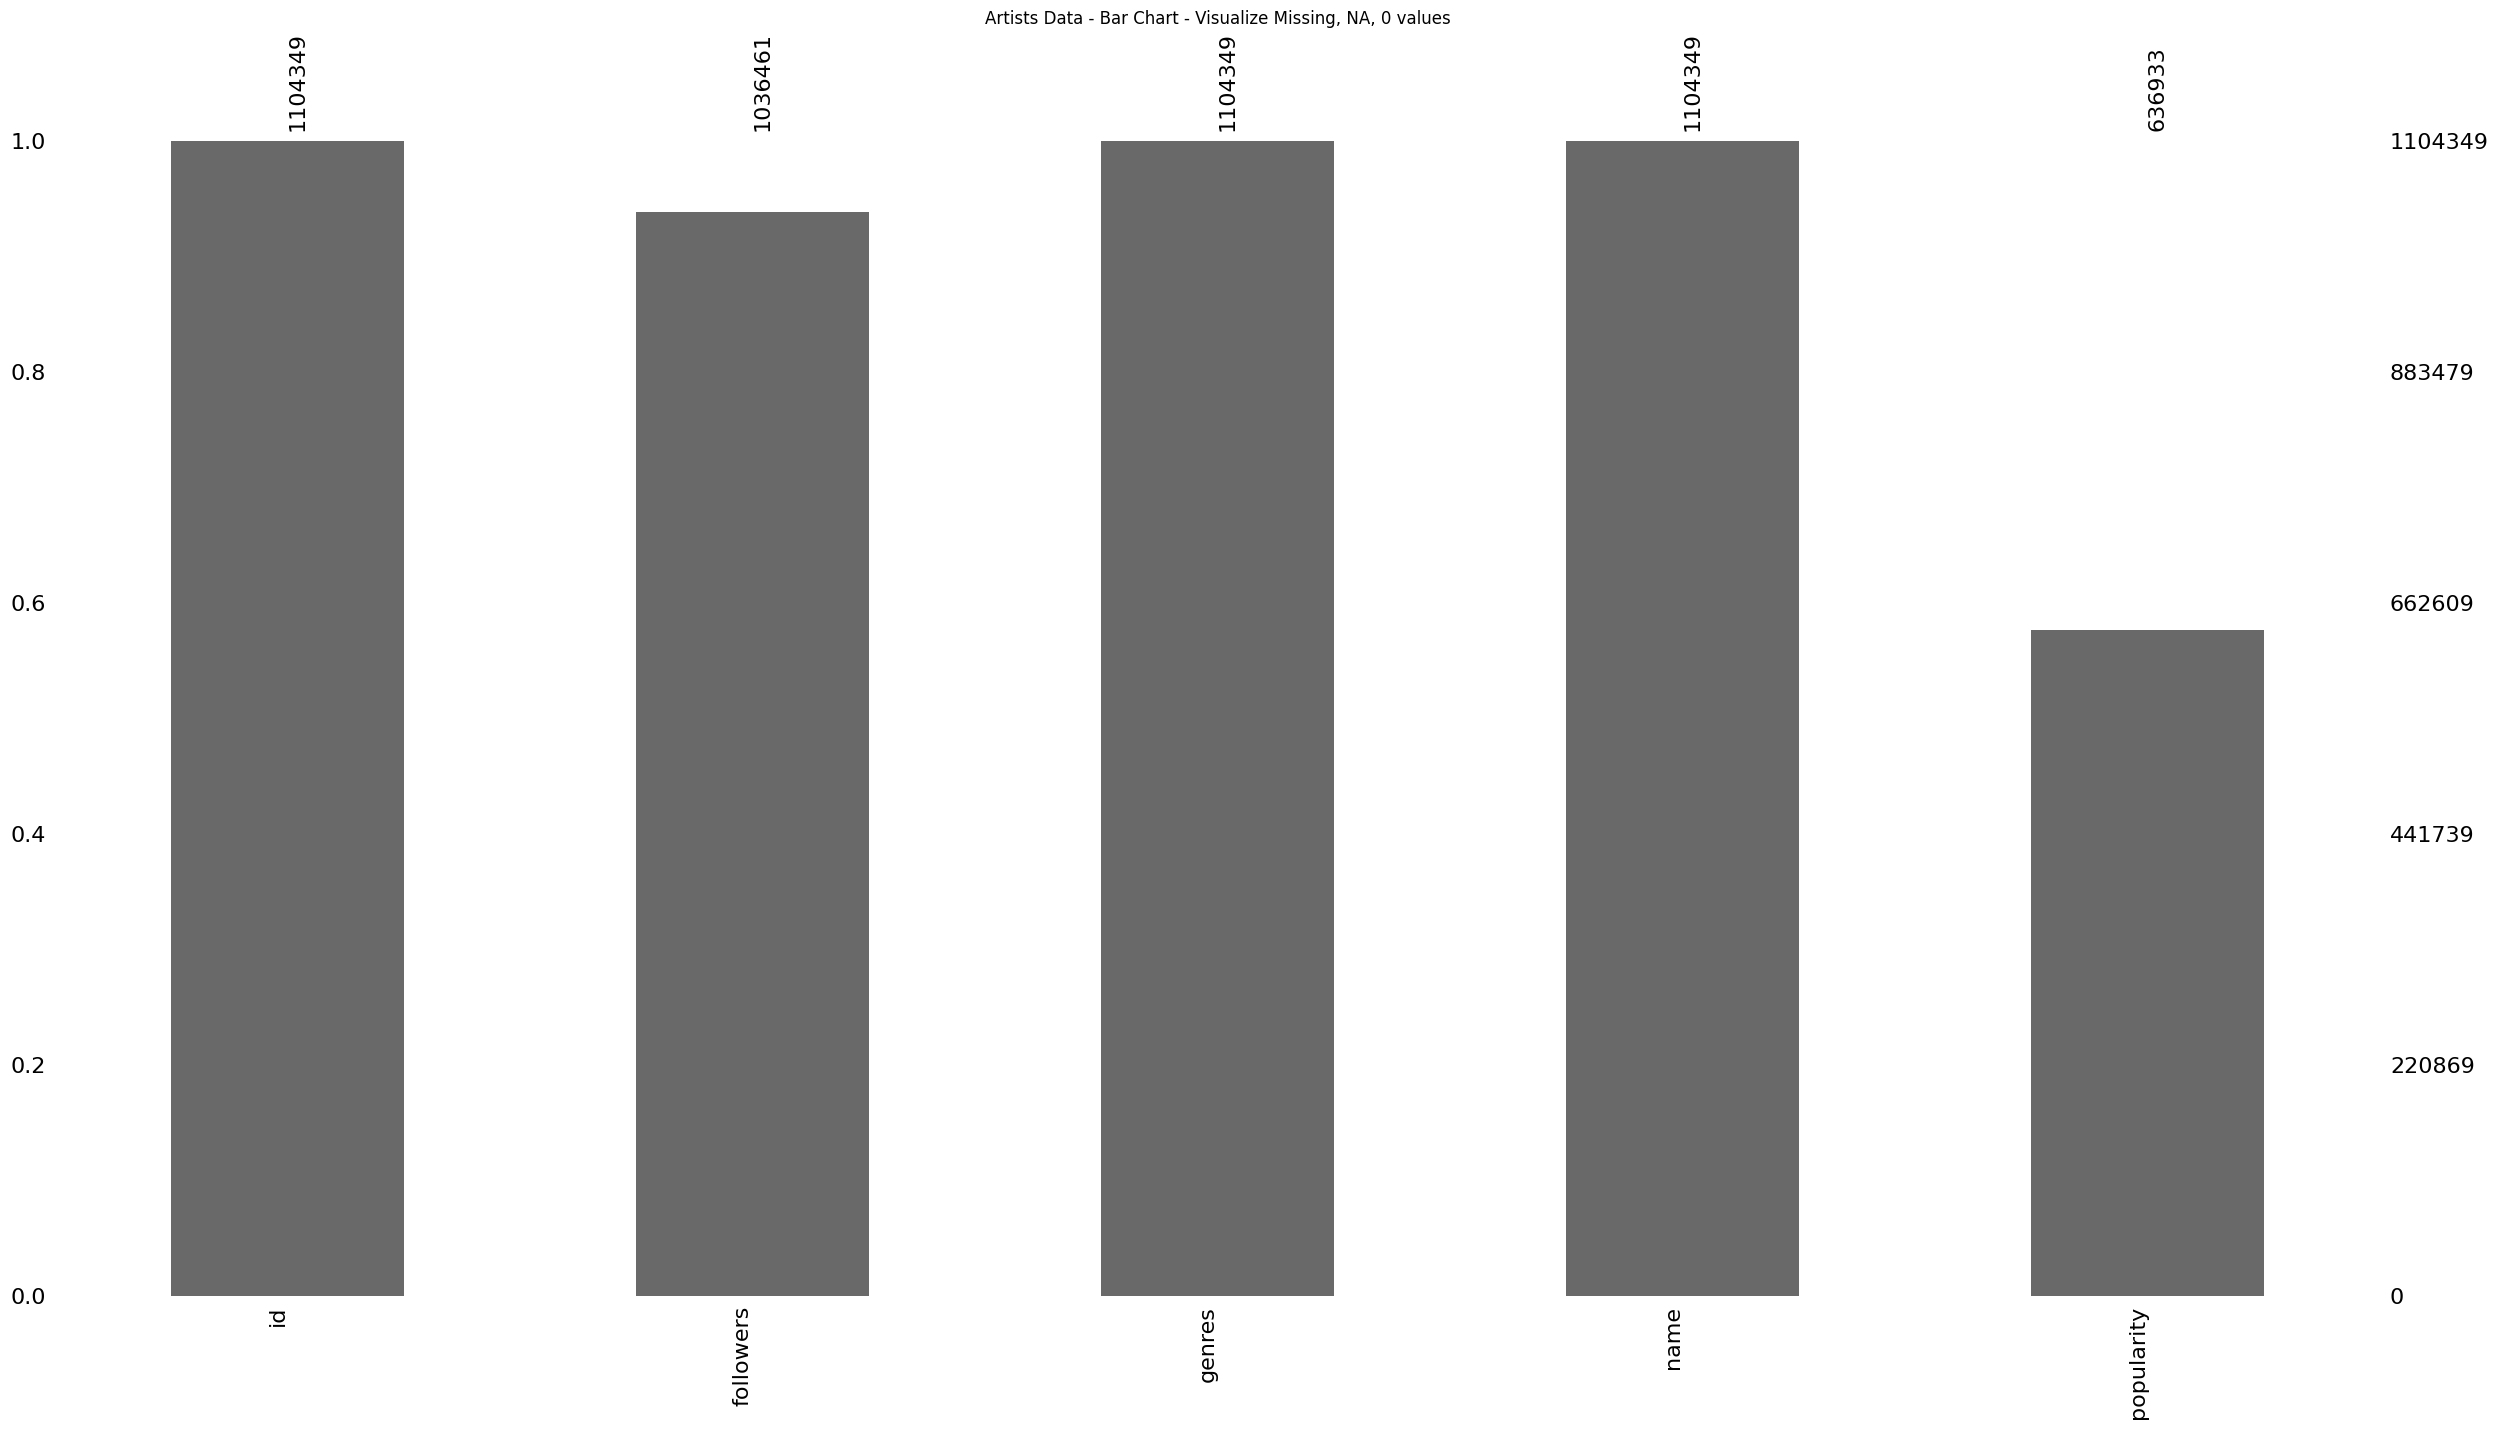

In [ ]:
vis_missing_artists.Bar()